# 4) Brand Differentiation — Specification Bias

This section analyzes how each brand differs in its technical focus.  
By normalizing key specifications across all devices, the goal is to identify which brands emphasize performance, endurance, display size, or camera strength.  
The analysis highlights strategic trade-offs between feature focus and overall balance.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = "data/processed/all_brands_20k.csv"
FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)

cols = ["brand", "ram_gb", "storage_gb", "display_inch", "battery_mah", "camera_mp"]
df = df[cols].dropna()

df.head(3)

,brand,ram_gb,storage_gb,display_inch,battery_mah,camera_mp
0,Xiaomi,8.0,128.0,6.67,5100.0,200
1,Samsung,6.0,128.0,6.60,5000.0,50
2,OnePlus,6.0,128.0,6.18,4000.0,12


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
spec_cols = ["ram_gb", "storage_gb", "display_inch", "battery_mah", "camera_mp"]

df_norm = df.copy()
df_norm[spec_cols] = scaler.fit_transform(df[spec_cols])
brand_specs = df_norm.groupby("brand")[spec_cols].mean().round(3)
brand_specs

,ram_gb,storage_gb,display_inch,battery_mah,camera_mp
brand,,,,,
OnePlus,0.477,0.410,0.518,0.529,0.252
Oppo,0.420,0.418,0.522,0.585,0.256
Pixel,0.407,0.339,0.491,0.451,0.278
Realme,0.419,0.423,0.547,0.605,0.270
Samsung,0.327,0.326,0.493,0.460,0.291
Vivo,0.385,0.369,0.537,0.540,0.266
Xiaomi,0.341,0.363,0.490,0.443,0.393


---
## Brand Specification Profiles

The following radar charts visualize each brand’s average normalized specifications across five categories:  
RAM, Storage, Display, Battery, and Camera.  
These profiles highlight where brands invest most of their hardware emphasis.

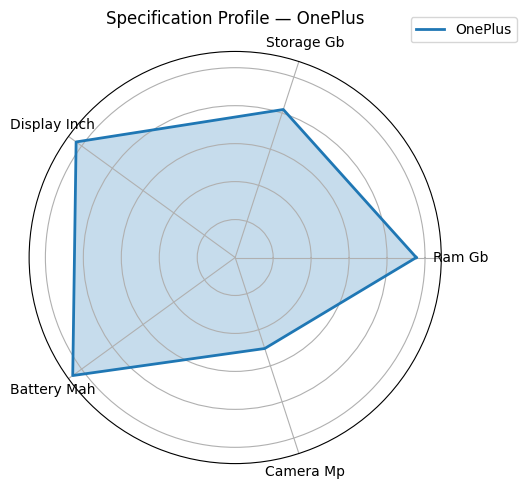

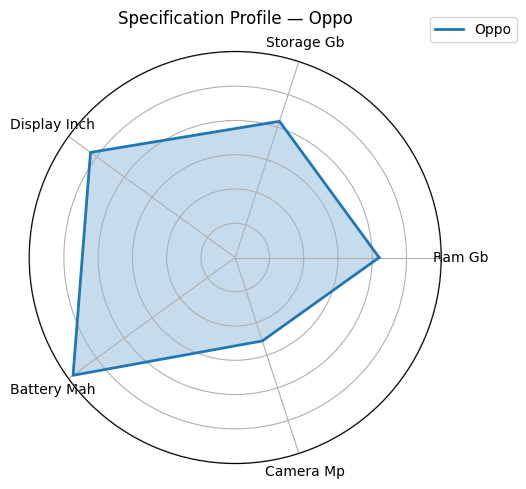

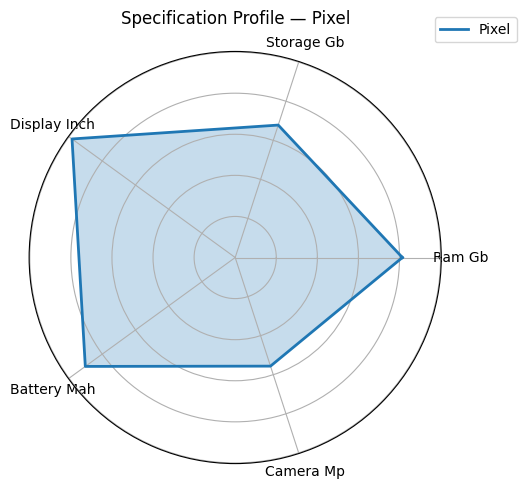

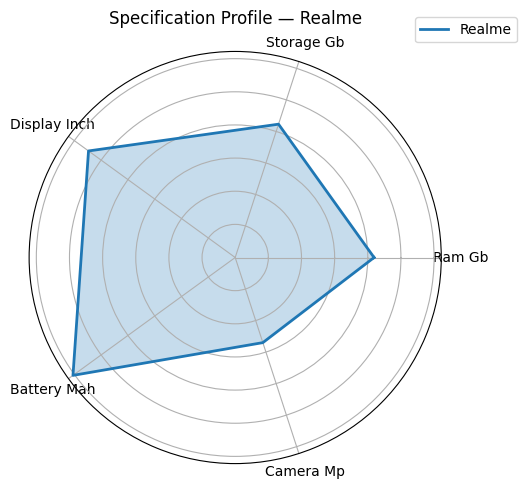

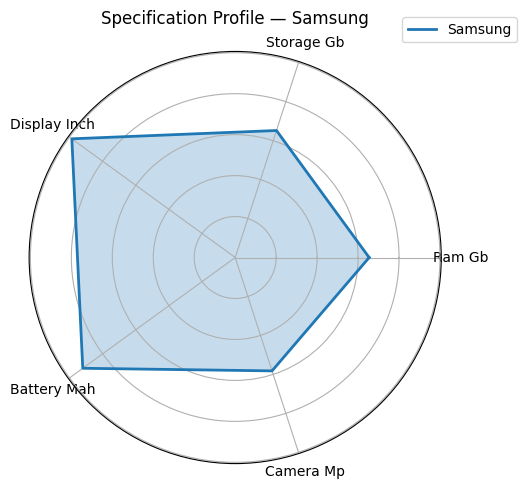

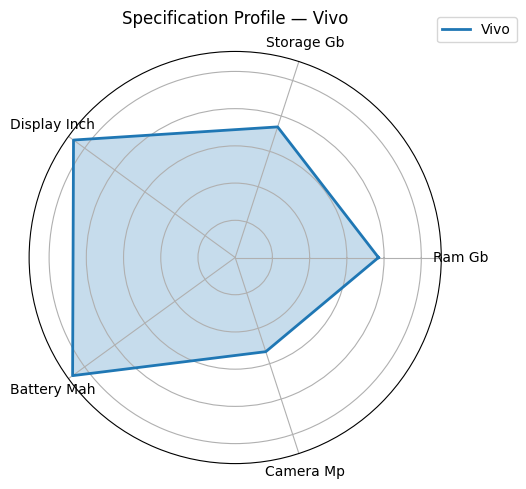

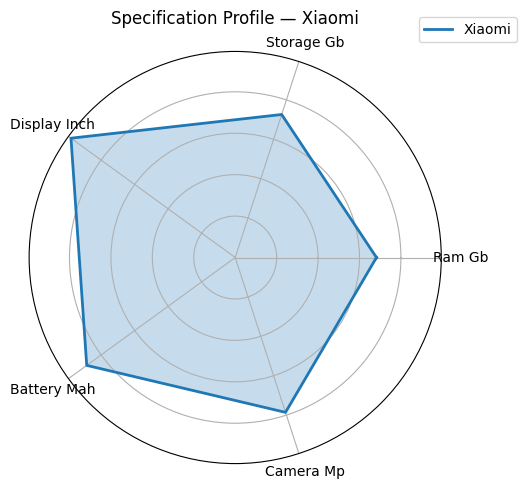

In [9]:
from math import pi

def plot_brand_radar(brand_name):
    categories = spec_cols
    N = len(categories)
    
    values = brand_specs.loc[brand_name].values.tolist()
    values += values[:1]  # close the loop

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(5.5, 5), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=brand_name)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([c.replace("_", " ").title() for c in categories])
    ax.set_yticklabels([])
    ax.set_title(f"Specification Profile — {brand_name}", pad=20)
    ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))
    plt.tight_layout()

    fig_path = os.path.join(FIG_DIR, f"radar_{brand_name.lower()}.png")
    plt.savefig(fig_path, dpi=200, bbox_inches="tight")
    plt.show()

for brand in brand_specs.index:
    plot_brand_radar(brand)

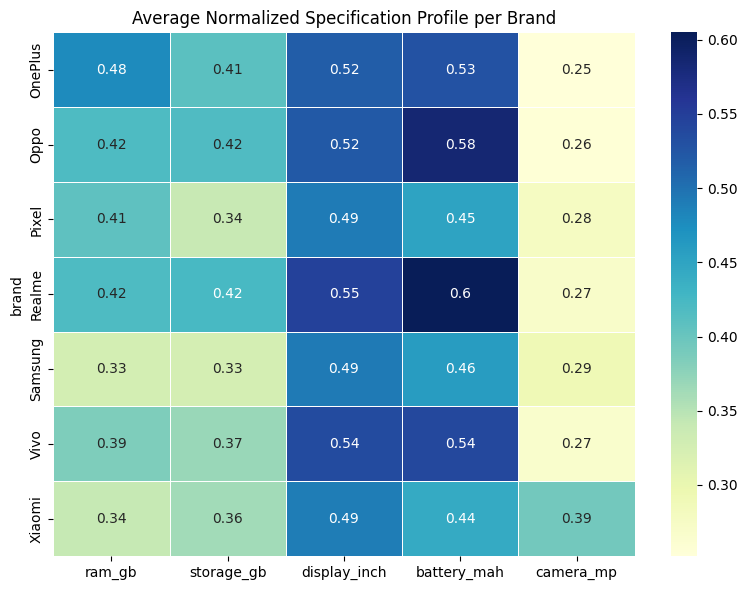

Saved: analysis/figures\brand_spec_bias_heatmap.png


In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(brand_specs, annot=True, cmap="YlGnBu", linewidths=0.4)
plt.title("Average Normalized Specification Profile per Brand")
plt.tight_layout()

fig_path_heat = os.path.join(FIG_DIR, "brand_spec_bias_heatmap.png")
plt.savefig(fig_path_heat, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_heat}")

---
# Summary & Insights — Brand Specification Bias

### Overview
This analysis compares brand-level emphasis across five major specifications — RAM, storage, display size, battery capacity, and camera megapixels — using normalized averages.  
Each specification was scaled to a 0–1 range to eliminate unit bias, allowing a fair comparison of brand tendencies and design priorities.

### Key Observations

| Brand | Dominant Traits | Summary of Spec Bias |
|--------|------------------|-----------------------|
| **OnePlus** | High RAM & balanced performance specs | Strong focus on performance hardware; ranks top in RAM (0.48) and near-top in battery efficiency (0.53). Targets users seeking speed and all-round reliability rather than camera-centric features. |
| **Oppo** | Battery-heavy & moderate overall balance | Slightly higher battery emphasis (0.59) than performance specs; aims for endurance and daily usability rather than raw power. |
| **Pixel** | Camera-oriented despite lower RAM/storage | Modest hardware specs but higher normalized camera (0.28). Reflects Google’s software-based optimization strategy — less hardware focus, more computational photography. |
| **Realme** | Balanced, endurance-focused | Consistently strong across all specs, especially battery (0.61) and display (0.55). Positions itself as a “complete value package” brand in the midrange space. |
| **Samsung** | Conservative on performance, solid camera/display | Lower normalized RAM and storage but slightly higher camera score (0.29). Relies on brand equity, build quality, and display tech rather than aggressive hardware. |
| **Vivo** | Consistent across metrics | Above-average across display (0.54), battery (0.54), and balanced performance. Typical mid-premium strategy emphasizing multimedia and aesthetics. |
| **Xiaomi** | Camera-driven spec sheet | Stands out with the highest camera normalization (0.39) despite modest RAM/storage. Suggests an imaging-centric hardware focus, aiming to attract users via camera marketing. |

### Interpretation
- **Performance brands (OnePlus, Realme)** lead in RAM and storage, signaling their emphasis on smooth performance and responsiveness.
- **Battery and endurance specialists (Realme, Oppo, Vivo)** dominate the upper range for mAh capacity, catering to all-day usability and value-conscious users.
- **Camera-first brands (Pixel, Xiaomi, Samsung)** show higher camera normalization, but their approach differs — Pixel through software optimization, Xiaomi through hardware megapixel strength, Samsung through display and brand premium.
- **Samsung and Pixel** illustrate premium brands that *price on experience rather than raw specs*, evident from their lower normalized performance but sustained flagship status.

### Implications
- **For Consumers:** The right brand depends on usage preference — performance enthusiasts lean toward OnePlus/Realme, while camera-oriented users may prefer Xiaomi or Pixel.
- **For Analysts:** Spec normalization highlights how brand identities diverge beyond price; “balanced brands” like Realme and Vivo occupy the largest consumer overlap zones.
- **For Market Strategy:** The Indian 5G smartphone market remains segmented by *feature identity* — brands no longer compete purely on price but on the perception of being the “best in one dimension.”

---